# Final Project Submission

- Student Name: Deztany Jackson
- Student Pace: Self Pace
- Scheduled Project Review:
- Instructor Name: Morgan Jones
- Blog Post URL:


## Classification of Paris Housings - Luxury vs Basic

![Paris](images/paris_image.jpg)

# Business Understanding

Certain Paris Real Estate (RE) investment agencies are looking to invest in luxury properties to lease
out to Hotels, VIP guests of the city  and Companies for their events, employees and clients. There are no rules for foreigners on owning property in France. As one of the  most expensive real estate cities in the world picking prime real estate to buy at the right time is a safe investment.

**Classification models will be built to correctly identify "Luxury" property and the best data attributes (features) that help make the best predictions.**

It is more important to correctly identify "Luxury" property as best as possible and minimize incorrectly identifying "Basic" property. This will cost having a long list of "Luxury" property but help the RE Investment agencies feel confident in the smaller set of listings.

Due to data imbalance and business goal our main metrics  will be : Precision and F1 

[F1 Score Metric, Joos Kortanje, 2021](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6)

# Data Understanding



This project uses dataset from kaggle and used for Educational Purposes "ParisHousing.csv". The intial dataset starts with 10,000 Rows of data and 18 Features (including "Category" the target value).

[Paris Kaggle Dataset, 2021](https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification)

### Import Libraries & Packages

In [1]:
#Import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,recall_score,accuracy_score, auc
from sklearn.metrics import precision_score, f1_score, confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
#from imblearn.metrics import classification_report_im
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import pickle

<b> Importing the data and checking the counts of the target variable <b>

In [2]:
# Import csv file
paris_df = pd.read_csv("data/ParisHousingClass.csv")
paris_df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5    Basic  
1      3653   2436     128               1             2  8085989.5   Luxury  
2      2937   8852     135               1             9  5574642.1    Basic  
3       659   7141     359               0             3  3232561.2    Basic  
4      8435   2429     292               1             4  7055052.0   Luxury

### Exploring  Paris Dataset
[Loan Classification,Kamal Khumar, 2021 ](https://www.kaggle.com/code/kamalkhumar/loan-status-prediction)

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Feature </th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Data Type</th> 
</tr>
</thead>
<tbody>
<td><b>Category</b></td>
<td>Classification of Real Estate<br> (Basic or Luxury)</td>
<td>Nominal Number</td>
</td>
<tr> 
<td><b>Price</b></td>
<td>Cost of RE<br> (Units unknown)</td>
<td>Cardinal Number</td>
</tr>
<tr> 
<td><b>Building_Size(m)</b></td>
<td>Size of the building<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Yard</b></td/>
<td>Has yard <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Has_Pool</b></td>
<td>Has Pool <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Floors</b></td>
<td>Number of Floors</td> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Rooms</b></td>
<td>Number of Rooms <br> (0; 1; 2; 3+)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>City_Part_Range</b></td>
<td>Thehigher the range, the more exclusive the neighbourhood is<br> </td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>City_Code</b></td>
<td>Zipcode<br> </td>(Number)
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_Previous_Owners</b></td>
<td>Number of Previous Ownder</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Garage_Size(m)</b></td>
<td>Size of the garage<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Attic_Size(m)</b></td>
<td>Size of the attic<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Has_Storm_Protector</b></td>
<td>Has Storm Protector <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Basement_Size(m)</b></td>
<td>Size of the basement<br> (meters)</td>
<td>Cardinal Number</td>
</tr>
<tr>
<td><b>Year_Built</b></td>
<td>Year built <br></td>
<td>Nominal Number</td>
</tr>
<tr>
<td><b>Num_of_Guest_Rooms</b></td>
<td>Number of Guest Rooms <br> (0; 1; 2; 3+)</td>
<td>Cardinal Number</td>
</tr>
<tr>
</tr>
<tr>
<td><b>Has_Storage_Room</b></td>
<td>Has Storage Room <br> (0:No,1:Yes)</td>
<td>Nominal Number</td>
</tr>
<tr> 
</tbody>
</table>

In [3]:
#Shape of dataset
paris_df.shape

(10000, 18)

In [4]:
#Value count of dataset
paris_df["category"].value_counts()


Basic     8735
Luxury    1265
Name: category, dtype: int64

In [5]:
#Value count of dataset
paris_df["cityCode"].value_counts()

36929    3
56356    3
37363    3
92628    3
16401    3
        ..
94771    1
9011     1
84338    1
21039    1
33301    1
Name: cityCode, Length: 9509, dtype: int64

This dataset has 10000 rows and 18 columns (including the target) <br>
 The main categorical values are "Basic" and "Luxury"

<b> The describe method helps to understand descrptive statistics. This is a look at the data as a whole and not 
broken down by category yet. <b>

In [6]:
#Describe the dataset
paris_df.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

- Based on the features decribing size , rooms and number of floors. Its is pretty clear that most of the properties are large buildings. There are a few outliers that may describe an apartment or room.
- These buildings are throughout the city based on the city code.
- About 50% of the buildings have a yard and pool. Having a yard for a building is a great ammenity.
- These buildings have an average of over 5 owners.
- For an old city the buildings are less than 35 years old with some as recents 2021.
- The average price of these buildings is ~5 Million Units, 10 Mill max. It is unclear if the price is in US Dollars or French Francs. Even if US Dollars 5 million USD may be cheap for large buildins.


<b> Checking for Null values & Datatypes

In [7]:
#Information on dataset
paris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

There are no textual values except for the target variable although some are categorical even though they are numerical. No missing rows.

<B> Dropping column that doesn't add value to the current dataset.  The "isNewBuilt" column tells similar information to the "made" column which describes year built.

In [8]:
#drop columns that don't seem to add value
paris_df = paris_df.drop(columns="isNewBuilt",axis =1)

In [9]:
#checking shape after deletion
paris_df.shape

(10000, 17)

<B> Checking for Null and Duplicate values. We would want to remove or impute certain values for Null, depending on where or what they are. We would want to remove any duplicate values.

In [165]:
#Any null values? - No NULL Values
paris_df.isnull().sum()
#No Null values

Building_Size(m)       0
Num_of_Rooms           0
Has_Yard               0
Has_Pool               0
Num_of_Floors          0
City_Code              0
City_Part_Range        0
Num_Previous_Owners    0
Year_Built             0
Has_Storm_Protector    0
Basement_Size(m)       0
Attic_Size(m)          0
Garage_Size(m)         0
Has_Storage_Room       0
Num_of_Guest_Rooms     0
Price                  0
Category               0
dtype: int64

In [166]:
#Checking for duplicates - None
paris_df.duplicated().sum() 

0

All features except for the category feature is numerical. There are no null values and textual placeholders. The describe outcome showed a few outliers but nothing that resembles placeholders. 

- Every Luxury property Has a pool and Has a Yard. This will most likely be most significant features.
- The average price may not be a determining factor in if a property is Luxury. This is usually a big factor that takes into account the features. 
<B> Other than the "Pool" and "Yard" feature, applying the mean on this data by category doesn't give explicit incite into what features will be significant in predicting the correct categy.

<b> Renaming Colums to make understanding feature names more intuitive and for better formatting


In [169]:
#Renaming columns for better clarity
old_cols = []
new_col = ['Building_Size(m)','Num_of_Rooms','Has_Yard','Has_Pool','Num_of_Floors','City_Code','City_Part_Range',
           'Num_Previous_Owners', 'Year_Built','Has_Storm_Protector',
           'Basement_Size(m)','Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room','Num_of_Guest_Rooms','Price','Category']
col_dict = {}
for ind, col in enumerate(paris_df.columns):
    col_dict[col] = new_col[ind]
print(col_dict)
paris_df.rename(columns = col_dict, inplace= True)

{'Building_Size(m)': 'Building_Size(m)', 'Num_of_Rooms': 'Num_of_Rooms', 'Has_Yard': 'Has_Yard', 'Has_Pool': 'Has_Pool', 'Num_of_Floors': 'Num_of_Floors', 'City_Code': 'City_Code', 'City_Part_Range': 'City_Part_Range', 'Num_Previous_Owners': 'Num_Previous_Owners', 'Year_Built': 'Year_Built', 'Has_Storm_Protector': 'Has_Storm_Protector', 'Basement_Size(m)': 'Basement_Size(m)', 'Attic_Size(m)': 'Attic_Size(m)', 'Garage_Size(m)': 'Garage_Size(m)', 'Has_Storage_Room': 'Has_Storage_Room', 'Num_of_Guest_Rooms': 'Num_of_Guest_Rooms', 'Price': 'Price', 'Category': 'Category'}


In [170]:
paris_df.columns

Index(['Building_Size(m)', 'Num_of_Rooms', 'Has_Yard', 'Has_Pool',
       'Num_of_Floors', 'City_Code', 'City_Part_Range', 'Num_Previous_Owners',
       'Year_Built', 'Has_Storm_Protector', 'Basement_Size(m)',
       'Attic_Size(m)', 'Garage_Size(m)', 'Has_Storage_Room',
       'Num_of_Guest_Rooms', 'Price', 'Category'],
      dtype='object')

# Exploring Data Features

<B> Our intial exploration is to visually see the countdistribution of the "Category" column

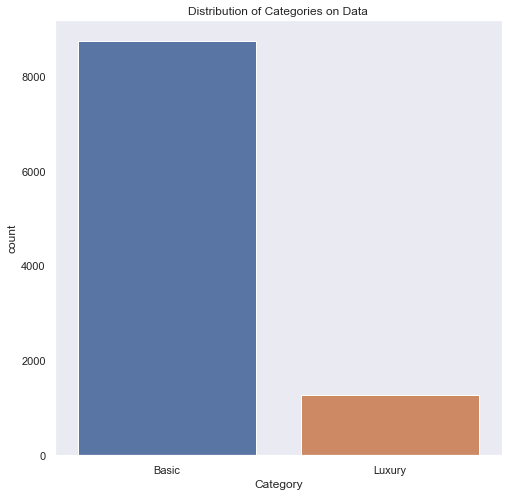

In [174]:
#Distribution of Category Variables
fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(x = "Category", data=paris_df)
plt.title('Distribution of Categories on Data')
plt.grid(axis = "y")
plt.show()
#plt.savefig("images/cat_dist.png", dpi=99)

 There is a significant amount of "Basic" instances vs. "Luxury"

<B> Changing the values of "Basic" and "Luxury" to 0 and 1 respectively. This will allow the values to be used in some visualizations and plots.

In [175]:
pdf = paris_df.copy()
pdf["Category"] = paris_df["Category"].map({"Basic":0, "Luxury":1})
pdf["Category"].value_counts()

0    8735
1    1265
Name: Category, dtype: int64

<B> Using a pairplot to understand the the entire dataset's distrubition and linearity. 


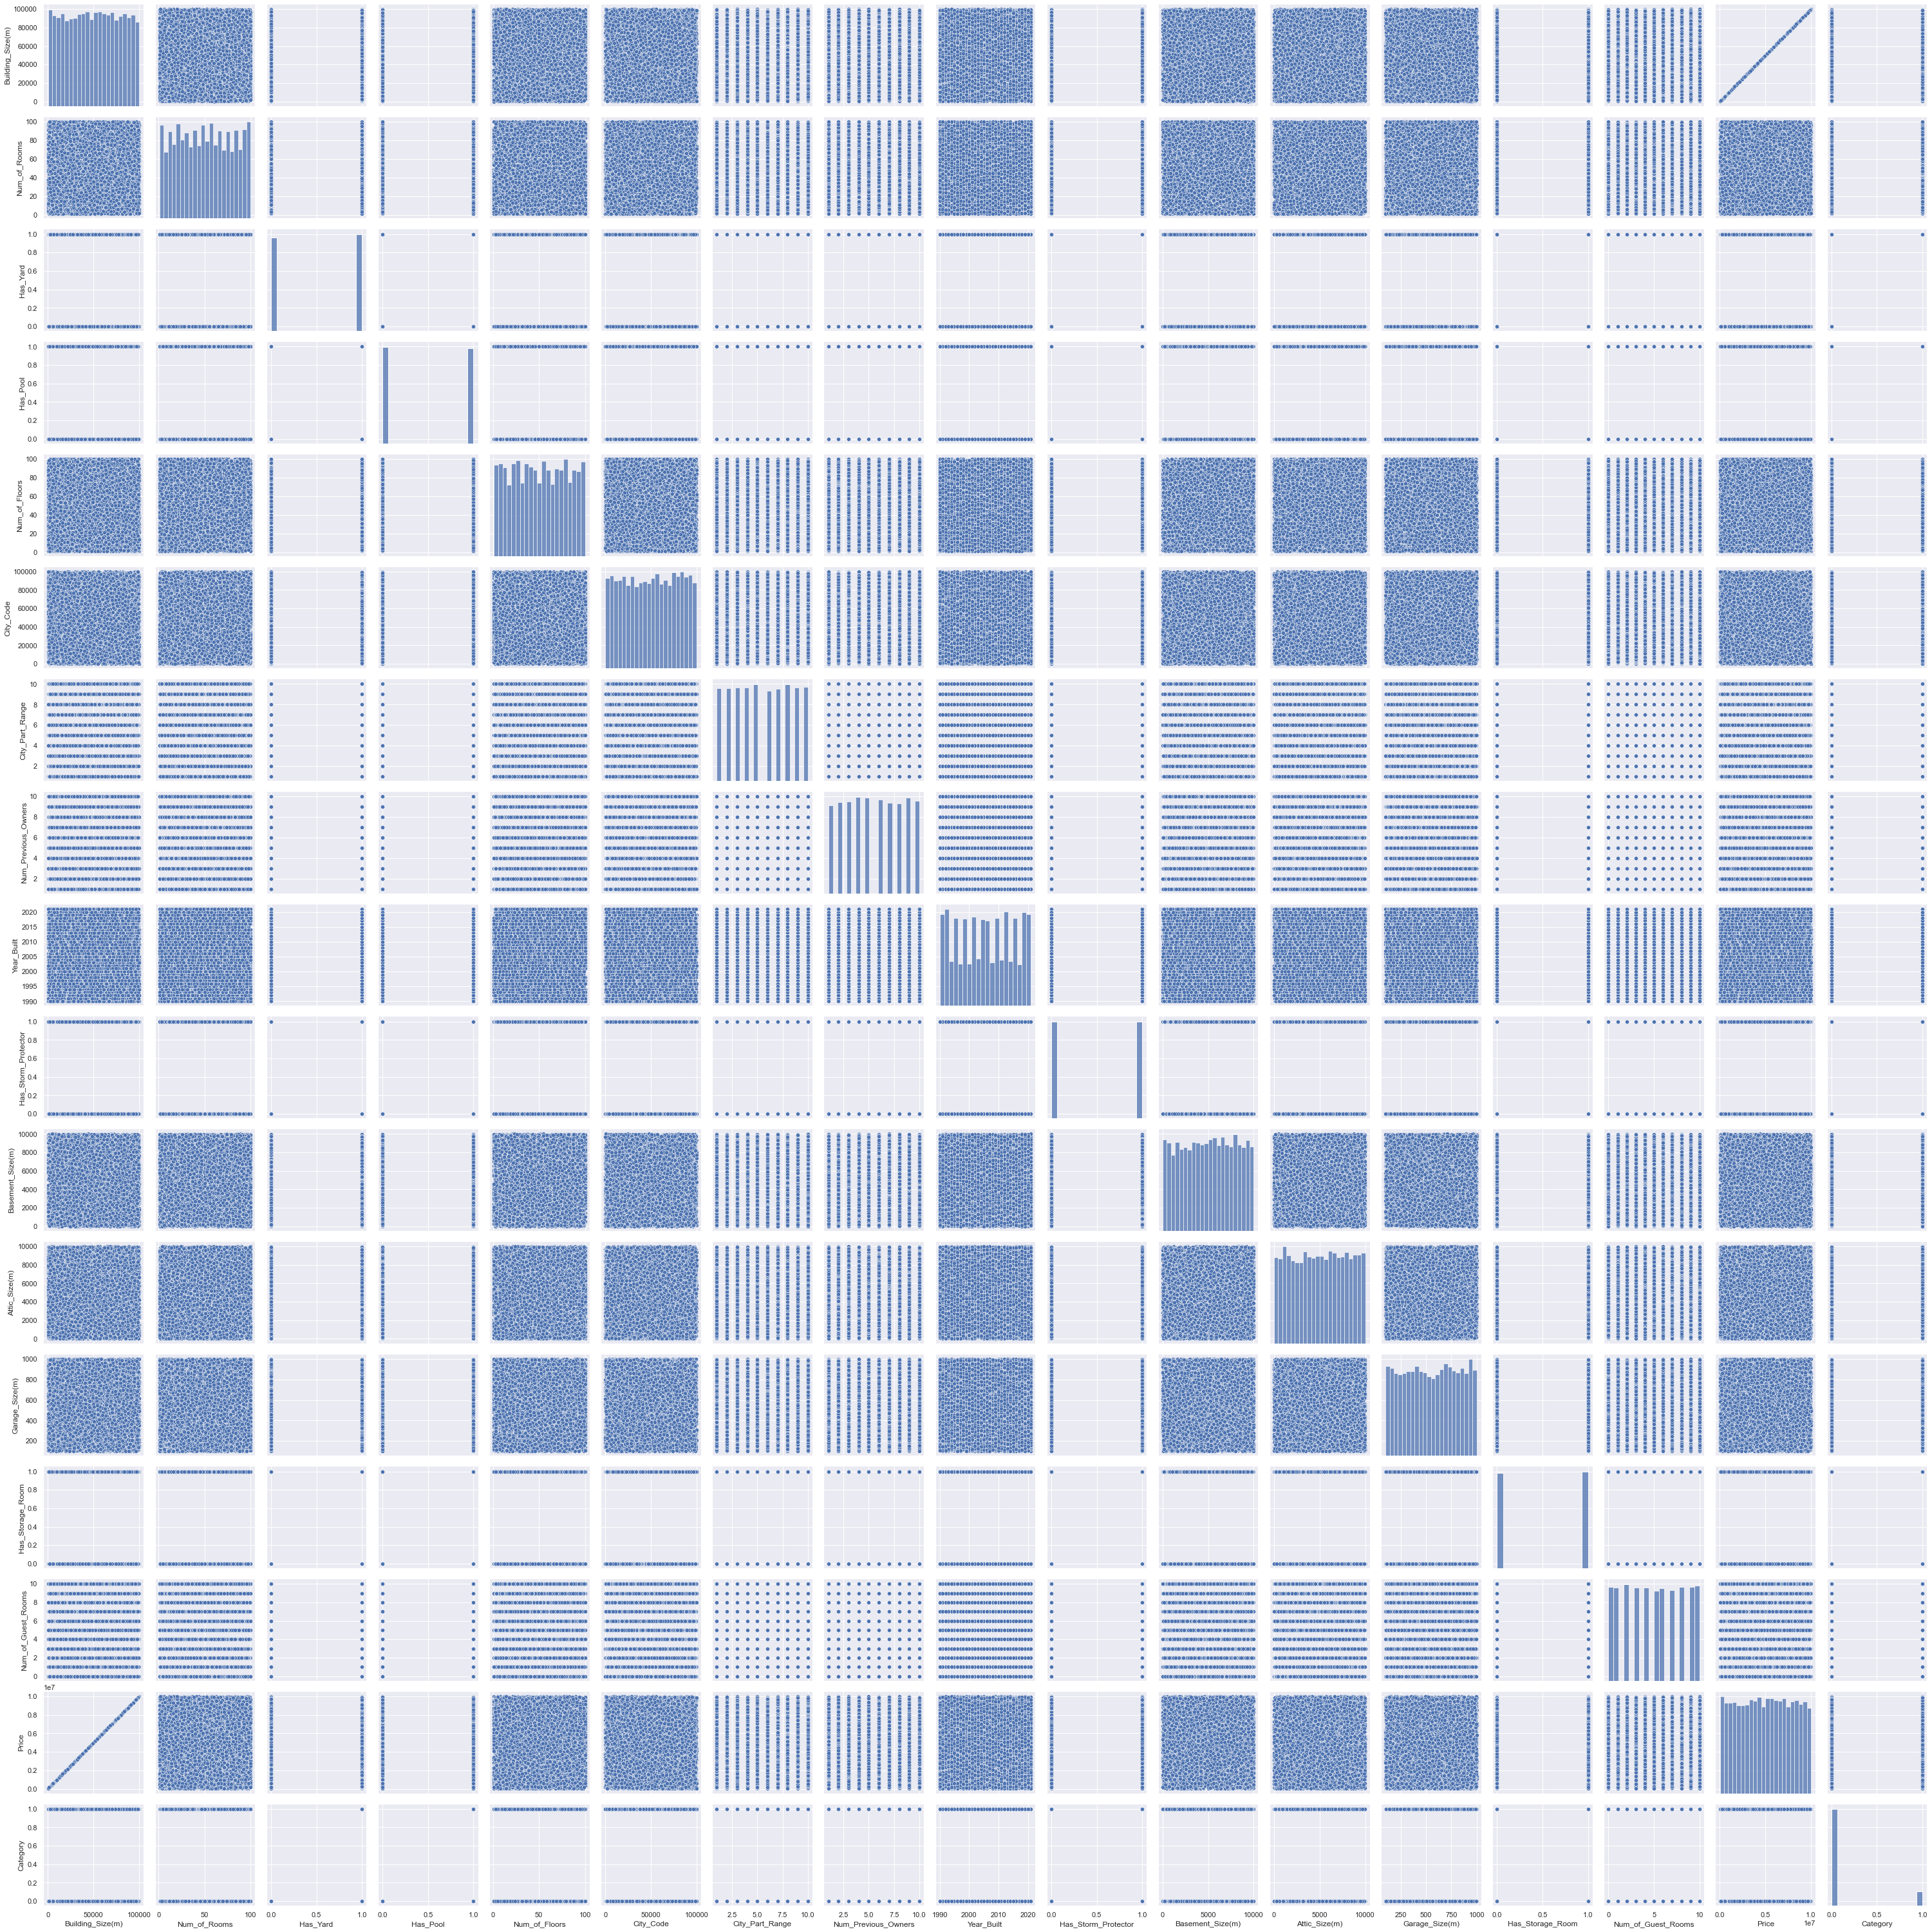

In [176]:
#Pair plot for quick view of the datasets distribution 
sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(pdf)

With so many features, it isn't easy to understand as well. From this highlevel perspective, 
most are evenly distributed pattern. It does look like property in the dataset fluctuated heavility 
up and down with the year built. It also looks like the only linear relationship is the "Price" and "Building_Size(m)"

<B> Understanding the correlation of the features to each other.  This supports multicollinearity understanding and feature importance.

In [177]:
#Print out correlation values in dataframe
corr = pdf.corr()
corr

Building_Size(m)  Num_of_Rooms  Has_Yard  Has_Pool  \
Building_Size(m)             1.000000      0.009573 -0.006650 -0.005594   
Num_of_Rooms                 0.009573      1.000000 -0.011240  0.017015   
Has_Yard                    -0.006650     -0.011240  1.000000  0.015514   
Has_Pool                    -0.005594      0.017015  0.015514  1.000000   
Num_of_Floors                0.001109      0.022244 -0.000883 -0.004006   
City_Code                   -0.001541      0.009040  0.006760  0.008072   
City_Part_Range              0.008758      0.008340  0.005023  0.014613   
Num_Previous_Owners          0.016619      0.016766  0.004279 -0.006848   
Year_Built                  -0.007207      0.003978  0.002214  0.001894   
Has_Storm_Protector          0.007480     -0.001656 -0.007598 -0.001001   
Basement_Size(m)            -0.003960     -0.013990 -0.008558 -0.007268   
Attic_Size(m)               -0.000588      0.012061 -0.003085 -0.011901   
Garage_Size(m)              -0.017246      0.023188 -0.004626  0.004832   
Has_Storage_Room            -0.003486     -0.004760 -0.009506  0.001238   
Num_of_Guest_Rooms          -0.000623     -0.015529 -0.007276  0.001123   
Price                        0.999999      0.009591 -0.006119 -0.005070   
Category                    -0.011800     -0.000442  0.373987  0.382995   

                     Num_of_Floors  City_Code  City_Part_Range  \
Building_Size(m)          0.001109  -0.001541         0.008758   
Num_of_Rooms              0.022244   0.009040         0.008340   
Has_Yard                 -0.000883   0.006760         0.005023   
Has_Pool                 -0.004006   0.008072         0.014613   
Num_of_Floors             1.000000   0.002207        -0.004921   
City_Code                 0.002207   1.000000         0.011334   
City_Part_Range          -0.004921   0.011334         1.000000   
Num_Previous_Owners       0.002463  -0.007549         0.009238   
Year_Built                0.005022   0.009266         0.007748   
Has_Storm_Protector      -0.008566  -0.004941         0.005224   
Basement_Size(m)          0.006228   0.002652         0.004743   
Attic_Size(m)            -0.000270  -0.002019         0.010696   
Garage_Size(m)            0.011303  -0.002208        -0.001648   
Has_Storage_Room          0.003616   0.002554        -0.011338   
Num_of_Guest_Rooms       -0.021155  -0.003338        -0.007153   
Price                     0.001654  -0.001539         0.008813   
Category                 -0.003827   0.003950        -0.003171   

                     Num_Previous_Owners  Year_Built  Has_Storm_Protector  \
Building_Size(m)                0.016619   -0.007207             0.007480   
Num_of_Rooms                    0.016766    0.003978            -0.001656   
Has_Yard                        0.004279    0.002214            -0.007598   
Has_Pool                       -0.006848    0.001894            -0.001001   
Num_of_Floors                   0.002463    0.005022            -0.008566   
City_Code                      -0.007549    0.009266            -0.004941   
City_Part_Range                 0.009238    0.007748             0.005224   
Num_Previous_Owners             1.000000    0.006858             0.002522   
Year_Built                      0.006858    1.000000            -0.000645   
Has_Storm_Protector             0.002522   -0.000645             1.000000   
Basement_Size(m)               -0.000862   -0.005506            -0.005001   
Attic_Size(m)                   0.000719    0.013773            -0.003753   
Garage_Size(m)                  0.020268    0.005687             0.003758   
Has_Storage_Room                0.031707   -0.007868             0.001401   
Num_of_Guest_Rooms             -0.006082   -0.005431            -0.006549   
Price                           0.016619   -0.007210             0.007496   
Category                       -0.012843    0.005399             0.002182   

                     Basement_Size(m)  Attic_Size(m)  Garage_Size(m)  \
Building_Size(m)      

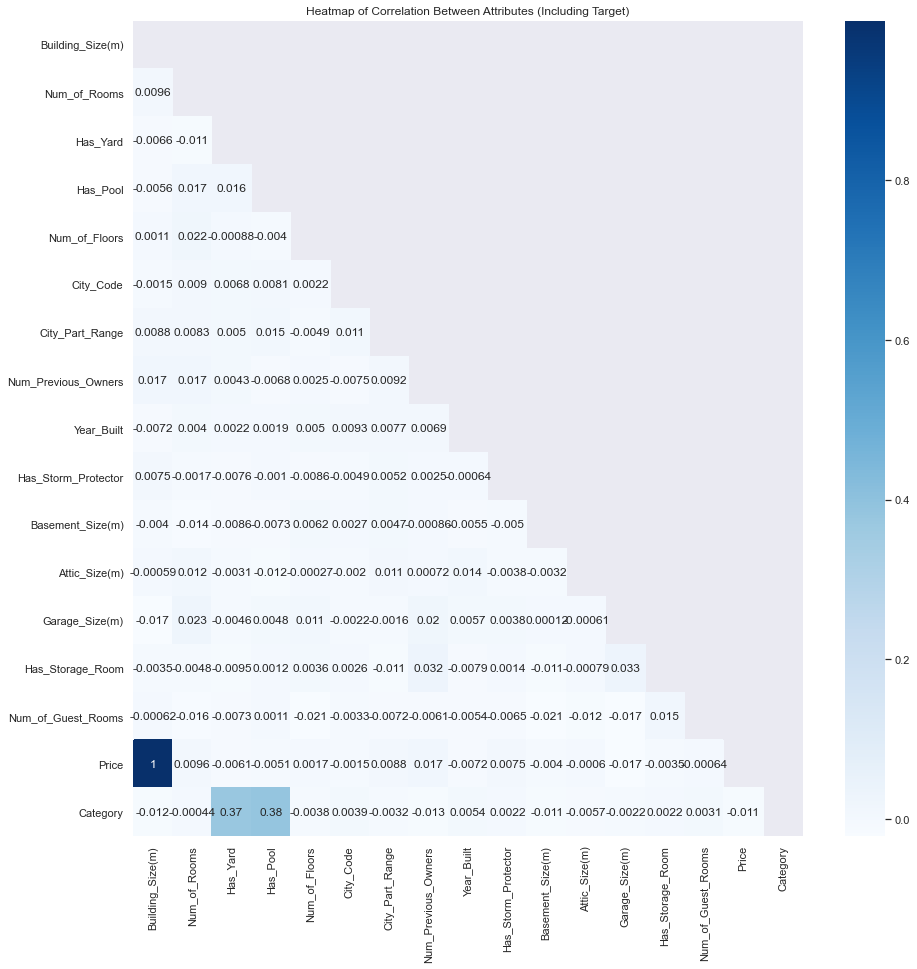

In [178]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(15,15),facecolor = "white")

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

plt.savefig("images/Int_Corr_2.png", dpi=99)

- Currently "Price" is 100% correlated to the "Building_Size(m)". Because we are doing classification, this doesn't have a great impact.
- Having a yard and pool have the highest correlation to the target, "Category"
- The other values have less than .005%

<B> Checking distribution of top correlated features.

<B> Checking the count distribution of Year_Built between category values.

In [182]:
pd.crosstab(paris_df["Category"],paris_df["Year_Built"])

Year_Built  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  \
Category                                                                ...   
Basic        272   282   327   267   268   248   280   260   282   254  ...   
Luxury        45    42    29    53    44    37    47    36    36    39  ...   

Year_Built  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Category                                                                
Basic        270   314   274   268   261   248   292   274   285   264  
Luxury        35    38    38    37    46    40    42    47    51    40  

[2 rows x 32 columns]

### Displaying other Visuals  to Support Data Understanding


The distribution amount of values are evenly distributed between each year respective category values.

<B> Plotting the Price Vs Building Size to understand where our target values are. "Basic" is blue "Luxury" is orange, and overlap is light orange.

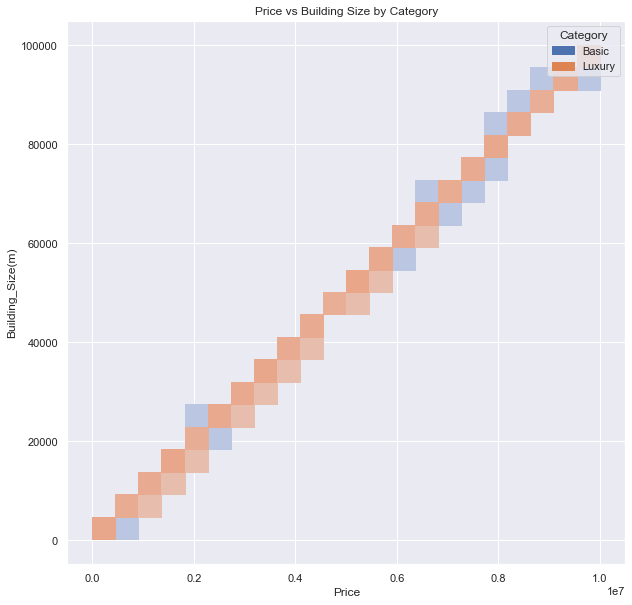

In [199]:
#Histogram plot with 
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
plot = sns.histplot(y = "Building_Size(m)", x ="Price" , hue = "Category", multiple= "fill", 
                    data = paris_df, bins= "auto").set(title= "Price vs Building Size by Category")

The overlap of the "Basic" and "Luxury" categories is the light orange.
- Both "Basic" and "Luxury"have prices and building size linearly distributed across the
min and max values of the data.
- At the higher prices and building size, the "Basic" property has more variation than the "Luxury. 
- I would have thought the "Basic" property would not cost as much, but that is not true
- I would have also thought the "Basic" property  would be smaller in size


<B> Viewing the distribution of Having a yard vs Price. 

#Cross tab of Category Values and Has_Yard Feature
pd.crosstab(paris_df["Category"],paris_df["Has_Yard"])


In [223]:
#Cross tab of Category Values and Has_Yard Feature
pd.crosstab(paris_df["Category"],paris_df["Has_Yard"])

Has_Yard     0     1
Category            
Basic     4913  3822
Luxury       0  1265

In [224]:
#View of the Has_Yard Vs Price
paris_df.groupby(["Has_Yard", 'Category'])['Price'].mean().unstack().fillna(0)

Category         Basic        Luxury
Has_Yard                            
0         5.011363e+06  0.000000e+00
1         4.998944e+06  4.907260e+06

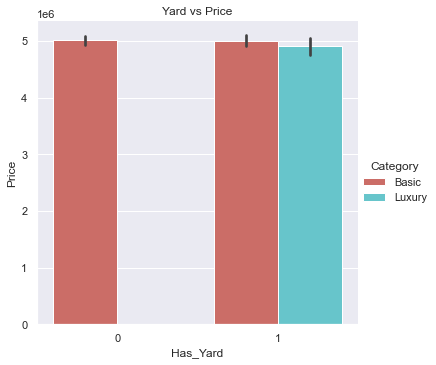

In [202]:

# Create barplot of status group and amount_tsh
sns.factorplot(x="Has_Yard", y='Price', data=paris_df, hue = "Category", kind = "bar",
               palette= "hls").set(title= "Yard vs Price") 

All "Luxury" properties have a yard 100% of the time. <br>
The "Basic" properties have a yard 44% of the time.<br>
All "Basic" property cost an average of ~5 Million with and without a yard. The "Basic" property w/o a yard is slightly more. <br>
The "Basic" property average cost of a property with a yard is more than a "Luxury" property's average. <br>

<B> Viewing the distribution of Having a pool vs Price. 

In [233]:
#Cross tab of Category Values and Has_Pool Feature
pd.crosstab(paris_df["Category"],paris_df["Has_Pool"])

Has_Pool     0     1
Category            
Basic     5032  3703
Luxury       0  1265

In [234]:
#View of the Has_Yard Vs Price
paris_df.groupby(["Has_Pool", 'Category'])['Price'].mean().unstack().fillna(0)

Category         Basic        Luxury
Has_Pool                            
0         5.007943e+06  0.000000e+00
1         5.003192e+06  4.907260e+06

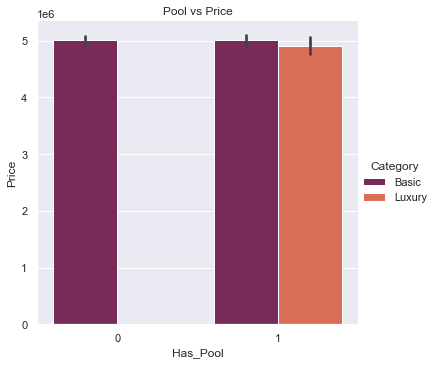

In [222]:
# Visualize averages of amount of water available by status group with barplot
# Create barplot of status group and amount_tsh
sns.factorplot(x="Has_Pool", y='Price', data=paris_df, hue = "Category",kind = "bar",
               palette= "rocket").set(title = "Pool vs Price")

All "Luxury" properties have a pool 100% of the time. <br>
The "Basic" properties have a pool 42% of the time.<br>
All "Basic" property cost an average of ~5 Million with and without a pool. <br>
The "Basic" property average cost of a property with a pool is more than the "Luxury" property's average. <br>

 <B> Viewing the distribution of Having a Storm Protector vs Price. 

In [236]:
#Cross tab of Category Values and Has_Pool Feature
pd.crosstab(paris_df["Category"],paris_df["Has_Storm_Protector"])

Has_Storm_Protector     0     1
Category                       
Basic                4372  4363
Luxury                629   636

In [237]:
#View of the Has_Yard Vs Price
paris_df.groupby(["Has_Storm_Protector", 'Category'])['Price'].mean().unstack().fillna(0)

Category                    Basic        Luxury
Has_Storm_Protector                            
0                    4.979922e+06  4.916014e+06
1                    5.031990e+06  4.898603e+06

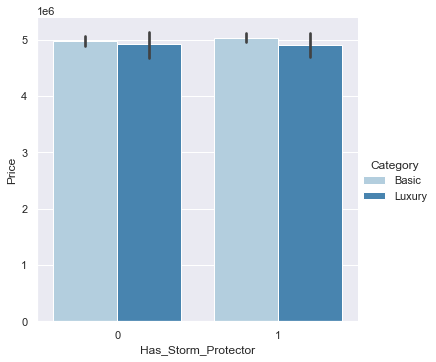

In [238]:
# Visualize averages of amount of water available by status group with barplot
# Create barplot of status group and amount_tsh
sns.factorplot(x="Has_Storm_Protector", y='Price', data=paris_df, hue = "Category", kind = "bar", palette= "Blues")

All "Luxury" properties have a storm protector ~50% of the time. "Luxury" property w/ a storm protector is slightly more. <br>
The "Basic" properties have a storm protector ~50% of the time.<br>
All "Basic" property cost an average of ~5 Million with and without a storm protector. <br>
All "Luxury" property cost an average of ~4.9 Million with and without a storm protector. <br>
The "Basic" property average cost of a property with a pool is more than the "Luxury" property's average. <br>

## Link to EDA Refernce to use
https://www.kaggle.com/code/abdallahaboelkhair/paris-housing-eda-and-model-comparison

# Data Preparation

In [240]:
X = paris_df.drop("Category", axis = 1)
y = paris_df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

In [241]:
#Checking to see if the value counts are stratified for imbalance
print(y_test.value_counts())
print(y_train.value_counts())

Basic     2184
Luxury     316
Name: Category, dtype: int64
Basic     6551
Luxury     949
Name: Category, dtype: int64


# Modeling

# Write out narrative of why we chose these models and the metrics and methods
-Dummy - Checking Accuracy, Precion and Confusion Matrix
- Simple Modeling Logistic, Dection and Random Forerest
- Standardizing and SMOTE
-Gridsearch on the the three
    Choose best model with best estimator
-Final model
- Choose the best Features

## Model 1 - Dummy Classifier Model 

[Dummy Classifier- Abiheet Sahoo, 2020 ](https://towardsai.net/p/data-science/dealing-with-class-imbalance%E2%80%8A-%E2%80%8A-dummy-classifiers)

<B> The initial model will be a dummy model. This is a classifier predicting based on"most frequent" values and not specific patterns in the data. Therefore this should show an accuracy rate similar to someone manually choosing.
    

In [247]:
#Instantiating and fitting the model
dummy_paris_df = DummyClassifier(strategy="most_frequent") # Using Most Frequent strategy
dummy_paris_df.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [245]:
#Cross Val results on training data
cv_results = cross_val_score(dummy_paris_df, X_train, y_train, cv=5)
cv_results.mean()

0.8734666666666666

In [34]:
cv_results = cross_val_score(dummy_paris_df, X_test, y_test, cv=5)
cv_results.mean()

0.8736

In [269]:
#Getting the  predicted y scores for train and test
dummy_y_train = dummy_paris_df.predict(X_train)
dummy_y_test = dummy_paris_df.predict(X_test)


The training and testing cv scores (accuracy) for choosing "Basic" are both ~ 873%. The model won't be used, but it is good fit based on training and test data.

In [249]:
#Score of guessing Luxury
print("Percent of guessing Luxury Accuracy= ", round(1-cv_results.mean(),2), "%")

Percent of guessing Luxury Accuracy=  0.13 %


<B> The data is imbalanced, therefore accuracy will not be the best metric. It will always learn in favor of the most frequent value. The cross matrix below shows the True predictions (True Negative, True Posiive) as well as those with Type I (False Negative) and Type II error (False Positive).

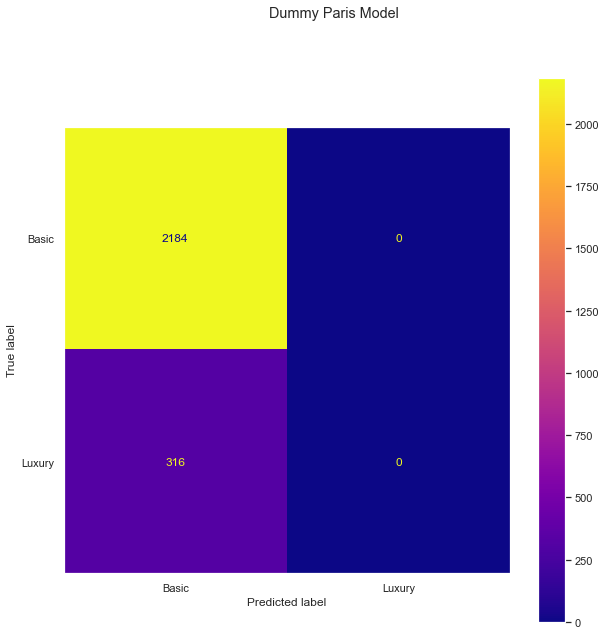

In [250]:
#Confusion Matrix using Test Data
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris Model")
plot_confusion_matrix(dummy_paris_df, X_test, y_test, ax=ax, cmap="plasma", )
plt.grid(False)


<B> With such a strong data imbalance, "Luxury" was never predicted at all, even no FP guesses. The model predicted all "Basic" property. We want to maximize correctly predicting "Luxury" and minimize incorrectly predictuing "Luxury".

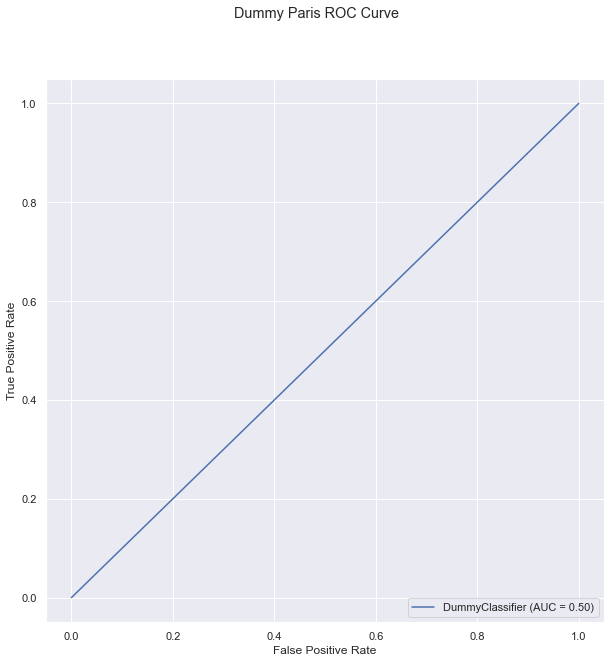

In [258]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Dummy Paris ROC Curve")
plot_roc_curve(dummy_paris_df, X_test, y_test, ax=ax)
#Increase the font size and labels

In [274]:

#Printing out Test data classification report with scores 
print("Train Classificaiton Report:\n", classification_report(y_train, dummy_y_train))
print("Test Classificaiton Report:\n", classification_report(y_test, dummy_y_test))

Train Classificaiton Report:
               precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      6551
      Luxury       0.00      0.00      0.00       949

    accuracy                           0.87      7500
   macro avg       0.44      0.50      0.47      7500
weighted avg       0.76      0.87      0.81      7500

Test Classificaiton Report:
               precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2184
      Luxury       0.00      0.00      0.00       316

    accuracy                           0.87      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.76      0.87      0.81      2500



<B> The AUC looks to be .5 with the test set.  ROC-AUC curve will not be the best for this imblanced dataset. It doesn't adequately explain the nuances of the dataset.
For future iterations the main metrics will be  Precision and  F1 . For future plots a Precision-Recall Curve will be sued.

### Chosen Metrics:

For future iterations Precision and F1 will be metrics in focus.<br>
**Precision**: The is to correctly identity "Luxury" and minimize incorrectly identifying "Basic". This will help understand this. <br>
**F1**: The dataset is imbalanced and accuracy doesn't take that into account.  The F1 score balances out the Precision and Recall score to give a harmonic mean, supporting the above goal. <br>

# Model 2.1 Simple Modeling  

For these next stage of modeling, three classificaiton models will be chosen to used on the current dataset.
Logistic Regression, Decision Tree, and Random Forest will be chosen as more sophisticated models compared to the Dummy classifier.  The Random Forest classifier is more advanced than the decision tree, it is made up of decision trees.
For these models, the default parameters will be used and scored. These will establish a more credible set of baseline models.

Each model will scored on training and test data.
The primary metrics to view and evaluate models by are: Precision and f1. Recall will be calculated to but secondary for evaluation and used support the f1 score.

Each model will have:
- Cross Validation Score (AverageAccuracy)
- **Precision**
- Recall
- **F1**
- Classification Report
- Cross Matrix

**Primary Evaluation Metrics in Bold**

## Model 2.1 - Logistic Regression Model (Simple Model)
Logistic regression uses a sigmoid function which helps to plot an "s"-like curve that enables a linear function to act as a binary classifier. This works well for our binary classification problem.


<B> Creating functions to implement the repetive code throughout the modeling

In [287]:
#Function to predict from fitted model
def simple_model_predict(fit_model,X):
    
    y_pred = fit_model.predict(X)
    y_pred_prob = fit_model.predict_proba(X)
    return y_pred, y_pred_prob

In [288]:
#Calculating precision, recall and f1
def precision_recall(y_true,y_pred,pos_label = "Luxury"):
    
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = np.mean(recall_score(y_true, y_pred, pos_label=pos_label))
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)
    
    print ("The Precision score is: {}".format(precision))
    print ("The Recall score is: {}".format(recall))
    print ("The F1 score is: {}".format(f1))
    print("\n")
    return precision, recall, f1

In [324]:
def cv_score(model, X, y):
    scores = cross_val_score(model, X, y, cv=5 )
    return  print("Accuracy of Model:",round(scores.mean(),3))
    

In [41]:
def cross_matrix_val():
    #Get cross matrix values

SyntaxError: unexpected EOF while parsing (<ipython-input-41-4bd9f2550a25>, line 2)

<B> Instatiating, fitting and predicting the logistic regression model.  The predicting is done on the trained and testing data.

In [289]:
#Instantiate
lr_simple = LogisticRegression(random_state = 42,penalty= "none") 
#Fit training data
lr_simple.fit(X_train,y_train)
#Predict with Train
lr_y_train_pred,lr_y_train_pred_prob  = simple_model_predict(lr_simple,X_train)
#Predict with Train
lr_y_test_pred,lr_y_test_pred_prob  = simple_model_predict(lr_simple,X_test)


###  Model 2.1 - Logistic Regression Model (Simple Model) Evaluation

#### Training Data Evaluation

In [325]:
### Train
cv_score(lr_simple, X_train, y_train)

Accuracy of Model: 0.873


In [293]:
#Precision, Recall and F1
#Train Score
print("Luxury Train Scores: \n")
precision_recall(y_train, lr_y_train_pred,"Luxury")


Luxury Train Scores: 

The Precision score is: 0.0
The Recall score is: 0.0
The F1 score is: 0.0




(0.0, 0.0, 0.0)

In [285]:
#Printing out report with scores for Train data
print(classification_report(y_train, lr_y_train_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      6551
      Luxury       0.00      0.00      0.00       949

    accuracy                           0.87      7500
   macro avg       0.44      0.50      0.47      7500
weighted avg       0.76      0.87      0.81      7500



<B> The precision, recall and fl-score of of the training data for Luxury value are all 0. This is no better than the Dummy classifier metrics.

In [281]:
#Print out array confusion matrix
print(confusion_matrix(y_train, lr_y_train_pred, labels = ["Basic","Luxury"]))

[[6551    0]
 [ 949    0]]


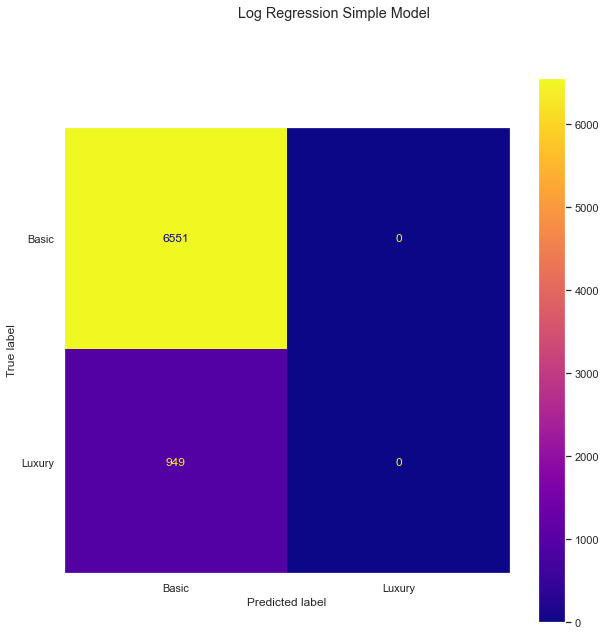

In [284]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_train, y_train, ax=ax, cmap="plasma")
plt.grid(False)

<B> Both this training set and the Dummy classifier test set did not correctly predict any "Luxury" values. It is not a fair comparison because it is training and test data, but they still are insufficient.

#### Test Data Evaluation

In [326]:
cv_score(lr_simple, X_test, y_test)

Accuracy of Model: 0.874


In [294]:
#Precision, Recall and F1
#Trest Score
print("Luxury Test Scores: \n")
precision_recall(y_test, lr_y_test_pred,"Luxury")

Luxury Test Scores: 

The Precision score is: 0.0
The Recall score is: 0.0
The F1 score is: 0.0




(0.0, 0.0, 0.0)

In [314]:
#Printing out report with scores -
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2184
      Luxury       0.00      0.00      0.00       316

    accuracy                           0.87      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.76      0.87      0.81      2500



All the metrics for the prediction, recall and f1 score for "Luxury" values are the same for the Dummy Classifier and LogReg training data.  They are all insufficient.

In [313]:
#Print out array confusion matrix
print(confusion_matrix(y_test, lr_y_test_pred, labels = ["Basic","Luxury"]))

[[2184    0]
 [ 316    0]]


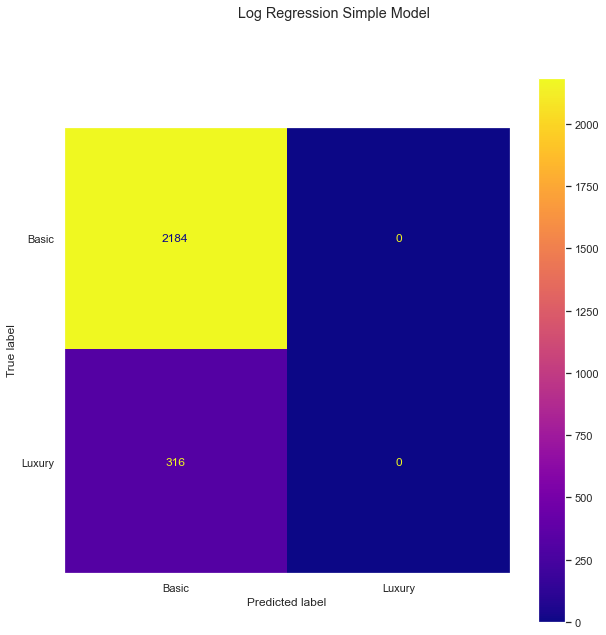

In [312]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Log Regression Simple Model")
plot_confusion_matrix(lr_simple, X_test, y_test, ax=ax, cmap="plasma");
plt.grid(False)

Currently the Dummy Classifier and teh Logistric Regression metrics for the "Luxury" value are all insufficient.
None of the models guess any value of "Luxury" correct.

## Model 2.2 - Decision Tree Model (Simple Model)

<B> The Decision Tree model will classify the data in various splits. For this model 

In [321]:
#Instantiate
dt_simple = DecisionTreeClassifier(random_state=42, criterion="entropy")
#Fit training data
dt_simple.fit(X_train,y_train)
#Predict with test
dt_y_train_pred = dt_simple.predict(X_train)
dt_y_test_pred = dt_simple.predict(X_test)
dt_y_test_prob = dt_simple.predict_proba(X_test)

#### Train  Data Evaluation

In [ ]:
<b> The decision tree 

In [327]:
# Decision Tree CV score
cv_score(dt_simple, X_train, y_train)

Accuracy of Model: 0.872


In [328]:
#Printing out report with scores -
print(classification_report(y_train, dt_y_train_pred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      6551
      Luxury       1.00      1.00      1.00       949

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [329]:
print(confusion_matrix(y_train, dt_y_train_pred, labels = ["Basic","Luxury"]))

[[6551    0]
 [   0  949]]


In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_train, y_train, ax=ax, cmap="plasma");

#### Test Data Evaluation

In [ ]:
scores = cross_val_score(dt_simple, X_test, y_test, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_test, dt_y_test_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_test, dt_y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Decision Tree Simple Model")
plot_confusion_matrix(dt_simple, X_test, y_test, ax=ax, cmap="plasma");

[Explaination of Precsion/Recall Curve Use](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

In [ ]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only

dt_precision,dt_recall, _ = precision_recall_curve(y_test, dt_y_test_prob[:,1],pos_label=[ "Luxury"])
#dt_f1 = f1_score(y_test, dt_y_test_pred, pos_label=['Basic', 'Luxury']) 
dt_auc =  auc(dt_recall, dt_precision)
print("auc:", round(dt_auc,2))
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))            

In [ ]:
plt.plot(dt_recall, dt_precision, marker='.', label='Luxury')
#axis labels
plt.title("Decision Tree Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

In [ ]:
## Optional, show visualization of tree

## Model 2.3 - Random Forest Model (Simple Model)

In [ ]:
#Instantiate
rf_simple = RandomForestClassifier(random_state = 42) 
#Fit training data
rf_simple.fit(X_train,y_train)
#Predict with test
rf_y_train_pred = rf_simple.predict(X_train)
rf_y_test_pred = rf_simple.predict(X_test)
rf_y_test_prob = rf_simple.predict_proba(X_test)

#### Train Data Evaluation

In [ ]:
scores = cross_val_score(rf_simple, X_train, y_train, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_train, rf_y_train_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_train, rf_y_train_pred))

#### Test Data Evaluation

In [ ]:
scores = cross_val_score(rf_simple, X_test, y_test, cv=5 )
scores.mean()

In [ ]:
print(confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"]))

In [ ]:
print(classification_report(y_test, rf_y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Simple Model")
plot_confusion_matrix(rf_simple, X_test, y_test, ax=ax,normalize = "true", cmap="plasma");
plt.grid(False)

In [ ]:
## Add the Precision/Recall Curve to the decison tree stuff
#probability of luxury scores only


rf_precision,rf_recall, _ = precision_recall_curve(y_test, rf_y_test_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(rf_recall, rf_precision)
print("auc:", round(rf_auc,2))


In [ ]:
rf_recall

In [ ]:
plt.plot(rf_recall, rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()

## Data Prep - SMOTE [Imbalance] and scale and Pipeline
[Logistric Regression Cumulative Lab](https://github.com/learn-co-curriculum/dsc-logistic-regression-lab/tree/solution)

## Log Reg with smote non pipleline

In [ ]:
#Create a function, run loop for each type of classifier
#Log Regression, Decision Tree, Random Forest

#Create Pipeline for each classifier 
# create list of classifiers 
clf_dict = {"lgr":LogisticRegression(random_state=42), "dt":DecisionTreeClassifier(random_state=42), "rf":RandomForestClassifier(random_state=42)}
pipe_dict = {}
for name,clf in clf_dict.items():
    
    #Name of Classifier
    print("{} Classifier".format(clf))
    print('---' * 20)
    print("\n")
    
    
    #Create pipelines
    imb_pipe = ImPipeline(steps=[('ct', StandardScaler()),
                                 ('sm', SMOTE( random_state=42)),
                                 (name, clf)])
    
    print(imb_pipe)
    print("\n")
    
    #fitting the pipeline on the training data
    imb_pipe.fit(X_train, y_train)
    
    
    
    #Training Accuracy score
    print("Training Accuracy score:{0:0.2f}".format(imb_pipe.score(X_train, y_train)))
    
    #Testing Accuracy score
    print("Testing Accuracy score:{0:0.2f}".format(imb_pipe.score(X_test, y_test)))
    print("\n")
    
    #Creating a dictionary of the different pipelines
    pipe_dict[name] = imb_pipe
    
    #Predicting the new data
    y_test_pred = imb_pipe.predict(X_test)
    
    #Predicting the new data
    y_test_prob = imb_pipe.predict_proba(X_test)
    y_test_prob = y_test_prob[:,1]
    
    #Classification Report
    print("Classification Report:\n",classification_report(y_test, y_test_pred))
    print("\n")
    
    #Confusion Matrix
    cf_matrix = confusion_matrix(y_test, rf_y_test_pred, labels = ["Basic","Luxury"])
    print("Confusion Matrix: \n", cf_matrix)
    print("\n")
    

    #Plot Confusion Map Matrix
    fig = plt.figure(figsize = (6,6), facecolor = "white")
    fig.suptitle(" {} with SMOTE".format(clf))
    plot_confusion_matrix(imb_pipe, X_test, y_test, cmap="plasma")
    print("\n")
 
    #Plotting Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob, pos_label= "Luxury")
    
    fig= plt.figure(figsize = (6,6))
    plt.step(recall, precision, marker='.', label='Luxury')
    
    #axis labels
    plt.title("Precision-Recall Curve: {}".format(clf))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
    #Legend
    plt.legend()
    print('---' * 20)
    print("\n")
    
    
   
   
        
    

In [ ]:
cus_rec = make_scorer(recall_score,pos_label="Luxury")
cus_prec = make_scorer(precision_score,pos_label="Luxury")
cus_f1 =  make_scorer(f1_score,pos_label="Luxury")
#cus_auc =  make_scorer()
cus_accur =  make_scorer(accuracy_score)
scoring = {"Precision":cus_prec,"Rec": cus_rec,"F1":cus_f1,"Accuracy":cus_accur}

In [ ]:
#Used to print out results form gridsearch

def gridsearch_score(grid_name):
    
    print("Best Estimator:", grid_name.best_estimator_)
    print("\n")
    print("Best Paremeters:", grid_name.best_params_) 
    print("\n")
    print("Best Precision Score:", grid_name.best_score_)
    print("\n") 

    #Getting prediction value
    gs_y_pred_train = grid_name.predict(X_train)
    #Getting prediction value
    gs_y_pred_test = grid_name.predict(X_test)
    
    
    #Checking our metrics to see how well our model performed
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_train, gs_y_pred_train))
    print("Train Classification Report:\n", classification_report(y_train, gs_y_pred_train))
    print("\n")
    print("Best Train Estimator Score:", grid_name.best_estimator_.score(X_test, gs_y_pred_test))
    print("Test Classification Report:\n", classification_report(y_test, gs_y_pred_test))
    print('---' * 20)
    print("\n")
    

### LogisticRegression GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'lgr__penalty': ["none","l1"'l2', 'elasticnet'],
                      'lgr__solver': ["lbfgs", "liblinear", "saga"]}

gs_lgr = GridSearchCV(estimator= pipe_dict["lgr"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [ ]:
gs_lgr.fit(X_train, y_train)


In [ ]:
gridsearch_score(gs_lgr)

### DecisionTree GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'dt__criterion': ["gini", "entropy"],
                      'dt__max_depth': [None, 5,100],
                      'dt__min_samples_split': [2,7,9],
                      'dt__min_samples_leaf': [2,5,7]}

gs_dt = GridSearchCV(estimator= pipe_dict["dt"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)



In [ ]:
gs_dt.fit(X_train, y_train)

In [ ]:
gridsearch_score(gs_dt)

### Random Forest GridsearchCV

In [ ]:
parameters = {"sm__sampling_strategy":["minority",.2,.6],
                      'rf__n_estimators': [10,50,75],
                      'rf__criterion': ["gini", "entropy"],
                      'rf__max_depth': [None, 5,15,25,50],
                      'rf__min_samples_leaf': [2,5,7]}

gs_rf = GridSearchCV(estimator= pipe_dict["rf"], param_grid=parameters,
n_jobs= 3, refit = "Precision", scoring=scoring, return_train_score= True)

In [ ]:

gs_rf.fit(X_train, y_train)


In [ ]:
gridsearch_score(gs_rf)

## Choose Best Estimator

In [ ]:
#Confusion
 
#Graph best estimators confusion and map
#gRAPH THE pRECISION Recall curve

#Piuck best features
#TABLE AND GRAPH BEST features

#Filter features
#Run best features with estimator and compare scores
#Plot

#Eval
#Recommendations and Limitations *(Technical anD Business)

#EDA
#Business and DATA
#Format

    

In [ ]:
#Confusion Matrix
y_gs_rf_pred = gs_rf.best_estimator_.predict(X_test)
confusion_matrix(y_test,y_gs_rf_pred)

In [ ]:
gs_rf.best_estimator_

In [ ]:
#Map Confusion Matrix
fig, ax = plt.subplots(figsize = (10,10), facecolor = "white")
fig.suptitle("Random Forest Best Estimator")
plot_confusion_matrix(gs_rf.best_estimator_, X_test, y_test,ax=ax, normalize= "true", cmap="plasma");

In [ ]:
#Precision Recall on best estimator
y_gs_rf_prob = gs_rf.best_estimator_.predict_proba(X_test)
gs_rf_precision,gs_rf_recall, _ = precision_recall_curve(y_test, y_gs_rf_prob[:,1],pos_label=[ "Luxury"])
rf_auc =  auc(gs_rf_recall, gs_rf_precision)
print("auc:", round(rf_auc,2))


In [ ]:
#Get the precision and recall scores from the best estimator
fig= plt.plot(figsize = (15,15), facecolor = "white")
plt.plot(gs_rf_recall, gs_rf_precision, marker='.', label='Luxury')
#axis labels
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#Legend
plt.legend()


## Feature Selection
[Joshua Code, Feature Engineering]

In [ ]:
#Get the best features from the best  model
#Then do the pipeline on it

#rf_clf = RandomForestClassifier(criterion='entropy', max_depth=5,min_samples_leaf=7, n_estimators=10,random_state=42)

best_model = gs_rf.best_estimator_
feat_importance = best_model.steps[2][1].feature_importances_

In [ ]:
columns = X_train.columns

In [ ]:
rf_imp_features  = pd.DataFrame({"Features": columns,"Importance_Level": feat_importance})
rf_imp_features = rf_imp_features.sort_values(by = "Importance_Level",axis = 0, ascending=False, ignore_index = True)
rf_imp_features

In [ ]:
#Plotting Importance from Best Model
sns.barplot(x = feat_importance, 
            y = columns, 
            data = rf_imp_features,
            color = 'tab:blue',
            order=rf_imp_features["Features"],
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.title("Feature Importance of Best Mode",)
plt.xlabel('Feature Importance of Best Model')
plt.ylabel('Features')
plt.show()

#change size of labels

In [ ]:
# Choose top 5 Features

#Top 5 Features
rf_imp_features[0:5]


In [ ]:
"""Findings and Recommendations
In the previous two projects, the framing was primarily descriptive and inferential, meaning that you were trying to understand the distributions of variables and the relationship between them. For this project you can still use these techniques, but make sure you are also using a predictive approach.

A predictive finding might include:

How well your model is able to predict the target
What features are most important to your model
A predictive recommendation might include:

The contexts/situations where the predictions made by your model would and would not be useful for your stakeholder and business problem
Suggestions for how the business might modify certain input variables to achieve certain target results

"""

In [ ]:
gs_rf.best_index_

## 3rd Iteration - Choose best model to go on with [Grid/Random Searching ] Maybe Random Forest with pipeline

## Choose best features to do final mode with

# Evaluation

## Things to combe back and add

[Frequency dist of values in variables](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#9.-Exploratory-data-analysis-) 
[Visualize Decision Tree]

In [ ]:
#Pick
filename = 'gridsearch__model.pkl'

In [ ]:
pickle.dump(rf_gs, open(filename, 'wb'))